In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [13]:
earthquake_df = pd.read_csv("all_month.csv")
earthquake_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-10-13T02:06:45.547Z,62.258000,-149.688400,50.400000,2.20,ml,NaN,NaN,NaN,0.24000,...,2022-10-13T02:07:59.370Z,"13 km NE of Susitna North, Alaska",earthquake,NaN,1.000000,NaN,NaN,automatic,ak,ak
1,2022-10-13T01:53:35.883Z,35.951187,-97.873871,4.408605,2.17,ml,39.0,47.116041,0.092802,0.37182,...,2022-10-13T01:56:59.040Z,"4 km SE of Dover, Oklahoma",earthquake,1.821092,1.749625,NaN,31.0,automatic,ok,ok
2,2022-10-13T01:47:00.530Z,38.803001,-122.761169,0.570000,0.36,md,7.0,167.000000,0.002632,0.03000,...,2022-10-13T01:48:35.735Z,"3km N of The Geysers, CA",earthquake,0.560000,0.470000,NaN,1.0,automatic,nc,nc
3,2022-10-13T01:44:25.890Z,19.150667,-155.503174,33.330002,2.53,md,43.0,140.000000,NaN,0.12000,...,2022-10-13T02:05:07.625Z,"6 km SSW of Pāhala, Hawaii",earthquake,0.640000,0.760000,1.200,28.0,automatic,hv,hv
4,2022-10-13T01:41:24.537Z,64.795600,-151.394300,13.300000,1.50,ml,NaN,NaN,NaN,0.87000,...,2022-10-13T01:44:58.871Z,"42 km WSW of Manley Hot Springs, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,2022-09-13T02:43:00.144Z,-2.383900,138.189300,35.000000,4.20,mb,22.0,101.000000,5.958000,0.76000,...,2022-09-22T00:35:31.040Z,"269 km ESE of Biak, Indonesia",earthquake,12.900000,1.916000,0.166,10.0,reviewed,us,us
10331,2022-09-13T02:22:42.112Z,32.265930,-101.922042,7.654338,2.10,ml,18.0,61.000000,0.110026,0.20000,...,2022-09-13T03:36:53.866Z,"19 km NW of Stanton, Texas",earthquake,1.022959,2.926556,0.200,13.0,reviewed,tx,tx
10332,2022-09-13T02:20:38.347Z,39.599400,-120.414000,0.000000,0.90,ml,6.0,114.330000,0.151000,0.08560,...,2022-09-14T02:40:01.346Z,"2 km SSE of Sattley, California",earthquake,NaN,0.000000,0.220,3.0,reviewed,nn,nn
10333,2022-09-13T02:15:34.856Z,-58.606500,-15.963300,10.000000,4.60,mb,17.0,101.000000,14.171000,0.87000,...,2022-09-22T00:20:47.040Z,east of the South Sandwich Islands,earthquake,13.630000,1.901000,0.152,13.0,reviewed,us,us


In [37]:
# loading a data
earthquake_df = pd.read_csv("all_month.csv")
earthquake_df["time"]

# creating a new column with value 1
earthquake_df["frequency"] = 1

# making a new hour column to insert to the data frame
hour = []

for i in range(len(earthquake_df)):
        hour.append(int(earthquake_df["time"][i][11:13]))

earthquake_df["hour"] = hour

# grouping by hour and counting the sum for each hour
hour_series = earthquake_df.groupby(["hour"])["frequency"].count()

# making a new data frame that consists hour and count
hour_df = pd.DataFrame(data = hour_series)

# resetting the index
hour_df.reset_index(inplace = True)
hour_df

,hour,frequency
0,0,395
1,1,432
2,2,448
3,3,489
4,4,480
5,5,447
6,6,433
7,7,431
8,8,428
9,9,481


<Figure size 1000x300 with 0 Axes>

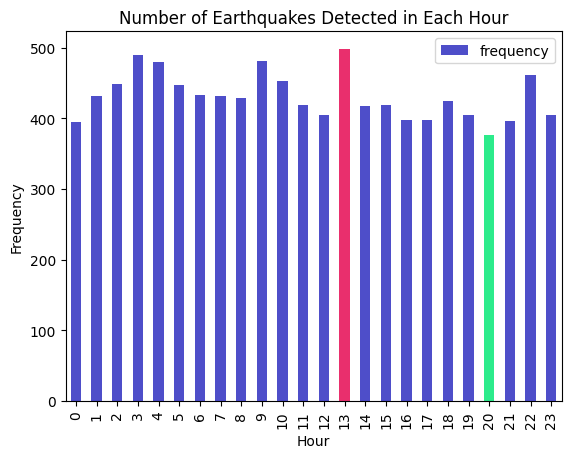

In [38]:
# creating a bar chart
plt.figure(figsize = (10, 3))

color = ["#E92F6D" if i == 13 else "#2CEB8B" if i == 20 else "#4E4EC9" for i in hour_df["hour"]]
hour_df.plot.bar(x = "hour" , y = "frequency", title = "Number of Earthquakes Detected in Each Hour", color=color)
plt.ylabel("Frequency")
plt.xlabel("Hour")
plt.show()

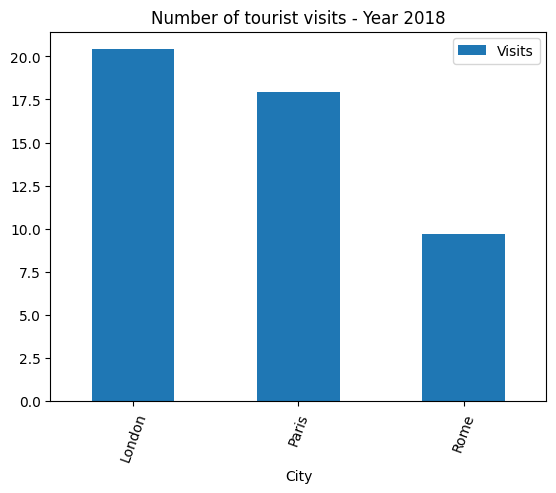

In [16]:
# Example bar chart from the Internet
data = {"City":["London", "Paris", "Rome"],

        "Visits":[20.42,17.95,9.7]

        }

# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data)

# Draw a vertical bar chart
dataFrame.plot.bar(x="City", y="Visits", rot=70, title="Number of tourist visits - Year 2018");

plt.show(block=True)